# XGBoost on Merge

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ieee-fraud-detection/sample_submission.csv
/kaggle/input/ieee-fraud-detection/test_identity.csv
/kaggle/input/ieee-fraud-detection/train_identity.csv
/kaggle/input/ieee-fraud-detection/test_transaction.csv
/kaggle/input/ieee-fraud-detection/train_transaction.csv


In [3]:
df = pd.read_csv('/kaggle/input/ieee-fraud-detection/train_transaction.csv')
Z = pd.read_csv('/kaggle/input/ieee-fraud-detection/train_identity.csv')

# Preprocesses to match Test column names

In [4]:
from sklearn.base import BaseEstimator, TransformerMixin
class InitialPreprocessor(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        pass

    def fit(self, X, y):
        return self

    def transform(self, X):
        X_transformed = X.copy()
        X_transformed.columns = X_transformed.columns.str.replace('_', '-')
        return X_transformed

# Train - Test Split

In [5]:
from sklearn.model_selection import train_test_split

W = df.drop(columns=['isFraud'])
X = pd.merge(W, Z, on='TransactionID', how='left')
y = df['isFraud']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

train_ids = X_train.pop('TransactionID')
vaild_ids = X_valid.pop('TransactionID')

In [6]:
X_train.loc[:,X_train.isna().mean() > 0]

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
5307,334.0,150.0,visa,226.0,debit,315.0,87.0,42.0,NaN,gmail.com,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191582,296.0,185.0,visa,226.0,credit,NaN,NaN,NaN,7.0,gmail.com,...,chrome 63.0,NaN,NaN,NaN,F,F,T,F,desktop,NaN
260168,268.0,150.0,visa,166.0,debit,476.0,87.0,NaN,NaN,gmail.com,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18516,583.0,150.0,visa,226.0,credit,126.0,87.0,NaN,NaN,verizon.net,...,chrome 62.0,24.0,1600x900,match_status:2,T,F,T,F,desktop,Windows
47538,514.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,...,chrome 62.0 for android,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SM-G950U Build/NRD90M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,555.0,210.0,visa,137.0,debit,296.0,102.0,NaN,NaN,hotmail.com,...,chrome 63.0,24.0,1366x768,match_status:2,T,F,T,T,desktop,Windows
259178,111.0,150.0,visa,226.0,credit,325.0,87.0,NaN,NaN,gmail.com,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
365838,555.0,150.0,visa,226.0,debit,191.0,87.0,1.0,NaN,gmail.com,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131932,321.0,150.0,visa,226.0,debit,204.0,87.0,NaN,NaN,yahoo.com,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# NA Processing # 

In [7]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

class NA_Preprocessor(BaseEstimator, TransformerMixin):
    def __init__(self, num_columns, cat_columns):
        self.num_columns = num_columns 
        self.cat_columns = cat_columns
        
    def fit(self, X, y):
        self.num_column_modes = X[self.num_columns].mode().T[0].to_dict()
        self.cat_column_modes = X[self.cat_columns].mode().T[0].to_dict()
        
        return self

    def transform(self, X):
        X_transformed = X.copy()
        # fill num_columns with modes
        for col in self.num_columns:
            X_transformed.fillna({col: self.num_column_modes[col]}, inplace=True)
        # fill cat_columns with modes
        for col in self.cat_columns:
            X_transformed.fillna({col: self.cat_column_modes[col]}, inplace=True)
        return X_transformed


# Feature Engineering

In [8]:
from sklearn.base import BaseEstimator, TransformerMixin

class CustomFeatureEngineer(BaseEstimator, TransformerMixin):
    
    def __init__(self, start_date='2017-12-01'):
        self.start_date = pd.to_datetime(start_date)
        
    def fit(self, X, y):
        return self

    def transform(self, X):
        X_transformed = X.copy()
        if 'TransactionDT' in X_transformed.columns:
            X_transformed['TransactionDT'] = pd.to_numeric(X_transformed['TransactionDT'], errors='coerce')
            X_transformed['TransactionDate'] = self.start_date + pd.to_timedelta(X_transformed['TransactionDT'], unit='s')

            # Feature engineering
            X_transformed['TransactionHour'] = X_transformed['TransactionDate'].dt.hour
            X_transformed['TransactionDay'] = X_transformed['TransactionDate'].dt.day
            X_transformed['TransactionWeekday'] = X_transformed['TransactionDate'].dt.weekday
            X_transformed['TransactionMonth'] = X_transformed['TransactionDate'].dt.month

            X_transformed.drop(columns='TransactionDT', inplace=True)
            X_transformed.drop(columns='TransactionDate', inplace=True)
            

        return X_transformed


# Custom Encoding

In [9]:
from sklearn.base import BaseEstimator, TransformerMixin

class CustomEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, woe_columns, one_hot_columns):
        self.woe_columns = woe_columns # Columns Which Should Be Preprocessed Using WOE
        self.one_hot_columns = one_hot_columns # Columns Which Should Be Preprocessed Using One Hot Encoder

    def fit(self, X, y):
        # Generate Fill Na Values Just in Case
        self.woe_columns_fill_na = X[woe_columns].mode().T[0].to_dict()
        
        df_woe = X.copy()
        target_col = 'target'
        df_woe[target_col] = y

        woe_mappings = {}
        iv_values = {}
        
        for col in self.woe_columns:
            print(f"Processing {col}...")
            
            groups = df_woe.groupby([col])[target_col].agg(['count', 'sum'])
            groups.columns = ['n_obs', 'n_pos']
            groups['n_neg'] = groups['n_obs'] - groups['n_pos']
            
            groups['prop_pos'] = groups['n_pos'] / groups['n_pos'].sum()
            groups['prop_neg'] = groups['n_neg'] / groups['n_neg'].sum()
            
            groups['woe'] = np.log(groups['prop_pos'] / groups['prop_neg'])
            groups['iv'] = (groups['prop_pos'] - groups['prop_neg']) * groups['woe']
            
            groups.replace([np.inf, -np.inf], 0, inplace=True)
            groups.fillna(0, inplace=True)
            
            woe_dict = groups['woe'].to_dict()
            iv = groups['iv'].sum()
            
            woe_mappings[col] = woe_dict
            iv_values[col] = iv

        self.woe_mappings = woe_mappings
        self.iv_values = iv_values
        return self


    def transform(self, X):
        X_transformed = X.copy()

        for col in self.woe_columns:
            X_transformed[f'{col}_woe'] = X_transformed[col].map(self.woe_mappings[col])
            X_transformed.drop(columns=col, inplace=True)

        X_transformed = pd.get_dummies(X_transformed, columns=self.one_hot_columns, drop_first=True, dummy_na=False, dtype=int)
       
        n = X_transformed.isna().mean()
        na_cols = list(n[n > 0].index)

        for col in na_cols:
            if "woe" not in col:
                print("Error Related to Nans")
            name = col.rpartition('_')[0]

            dic = self.woe_columns_fill_na
            mappings = self.woe_mappings
            X_transformed[col] = X_transformed[col].fillna(mappings[name][dic[name]])
            
        return X_transformed

# Final Custom Encoder

In [10]:
from sklearn.base import BaseEstimator, TransformerMixin

class FinalCustomEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, woe_columns, one_hot_columns, final_columns):
        self.woe_columns = woe_columns # Columns Which Should Be Preprocessed Using WOE
        self.one_hot_columns = one_hot_columns # Columns Which Should Be Preprocessed Using One Hot Encoder
        self.final_columns = final_columns
        
    def fit(self, X, y):
        # Generate Fill Na Values Just in Case
        self.woe_columns_fill_na = X[woe_columns].mode().T[0].to_dict()
        
        df_woe = X.copy()
        target_col = 'target'
        df_woe[target_col] = y

        woe_mappings = {}
        iv_values = {}
        
        for col in self.woe_columns:
            print(f"Processing {col}...")
            
            groups = df_woe.groupby([col])[target_col].agg(['count', 'sum'])
            groups.columns = ['n_obs', 'n_pos']
            groups['n_neg'] = groups['n_obs'] - groups['n_pos']
            
            groups['prop_pos'] = groups['n_pos'] / groups['n_pos'].sum()
            groups['prop_neg'] = groups['n_neg'] / groups['n_neg'].sum()
            
            groups['woe'] = np.log(groups['prop_pos'] / groups['prop_neg'])
            groups['iv'] = (groups['prop_pos'] - groups['prop_neg']) * groups['woe']
            
            groups.replace([np.inf, -np.inf], 0, inplace=True)
            groups.fillna(0, inplace=True)
            
            woe_dict = groups['woe'].to_dict()
            iv = groups['iv'].sum()
            
            woe_mappings[col] = woe_dict
            iv_values[col] = iv

        self.woe_mappings = woe_mappings
        self.iv_values = iv_values
        return self


    def transform(self, X):
        X_transformed = X.copy()

        for col in self.woe_columns:
            X_transformed[f'{col}_woe'] = X_transformed[col].map(self.woe_mappings[col])
            X_transformed.drop(columns=col, inplace=True)

        X_transformed = pd.get_dummies(X_transformed, columns=self.one_hot_columns, drop_first=True, dummy_na=False, dtype=int)
       
        n = X_transformed.isna().mean()
        na_cols = list(n[n > 0].index)

        for col in na_cols:
            if "woe" not in col:
                print("Error Related to Nans")
            name = col.rpartition('_')[0]
            dic = self.woe_columns_fill_na
            mappings = self.woe_mappings
            X_transformed[col] = X_transformed[col].fillna(mappings[name][dic[name]])
            
        return X_transformed[self.final_columns]

# Correlation Filtering

In [11]:
class CorrelationFilter(BaseEstimator, TransformerMixin):
    def __init__(self, threshold):
        self.threshold = threshold

    def fit(self, X, y):
        X_corr = X.copy()
        X_corr['target'] = y
        corr_matrix = X_corr.corr().abs()
        mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

        high_corr_pairs = []
        for i in range(len(corr_matrix.columns)):
            for j in range(i+1, len(corr_matrix.columns)):
                if corr_matrix.iloc[i, j] > self.threshold:
                    high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

        features_to_drop = []
        for feat1, feat2, _ in high_corr_pairs:
            if abs(X[feat1].corr(y)) < abs(X[feat2].corr(y)):
                features_to_drop.append(feat1)
            else:
                features_to_drop.append(feat2)
        self.features_to_drop = list(set(features_to_drop))
        return self

    def transform(self, X):
        # Drop highly correlated features
        print(self.features_to_drop)
        return X.drop(columns=self.features_to_drop)

In [12]:
!pip install optbinning
import matplotlib.pyplot as plt
from optbinning import OptimalBinning
from optbinning.binning.binning import BinningTable

import xgboost as xgb
import shap

!pip install kds
import kds
!pip install --upgrade scikit-learn==1.3.2 imbalanced-learn==0.11.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.9/213.9 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.1/28.1 MB 55.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.8/302.8 kB 18.7 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
  Attempting uninstall: absl-py
    Found existing installation: absl-py 1.4.0
    Uninstalling absl-py-1.4.0:
      Successfully uninstalled absl-py-1.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-cloud-translate 3.12.1 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, but you have protobuf 5.26.1 which i

# Shap Feature Importance

In [13]:
import xgboost as xgb
model = xgb.XGBClassifier()

X_train_i = InitialPreprocessor().fit_transform(X_train, y_train)
X_train_f = CustomFeatureEngineer().fit_transform(X_train_i, y_train)

cat_cols = [col for col in X_train_f.columns if X_train_f[col].dtype == 'object']
num_cols = [col for col in X_train_f.columns if X_train_f[col].dtype != 'object']

s = X_train_f[cat_cols].nunique()

threshold = 3

woe_columns = list(s[s > 3].index)
one_hot_columns = list(s[s <= 3].index)

X_train_t = NA_Preprocessor(num_cols, cat_cols).fit_transform(X_train_f, y_train)
X_train_encoded = CustomEncoder(woe_columns, one_hot_columns).fit_transform(X_train_t, y_train)

model.fit(X_train_encoded, y_train)

Processing ProductCD...
Processing card4...
Processing card6...
Processing P-emaildomain...
Processing R-emaildomain...
Processing id-30...
Processing id-31...
Processing id-33...
Processing id-34...
Processing DeviceInfo...


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

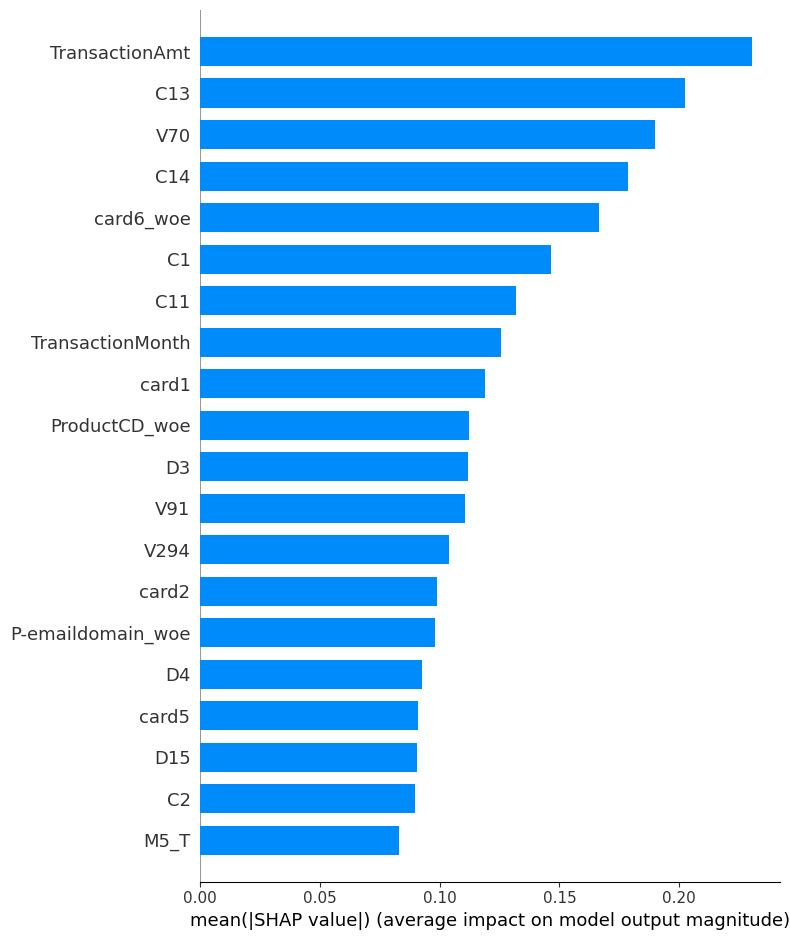

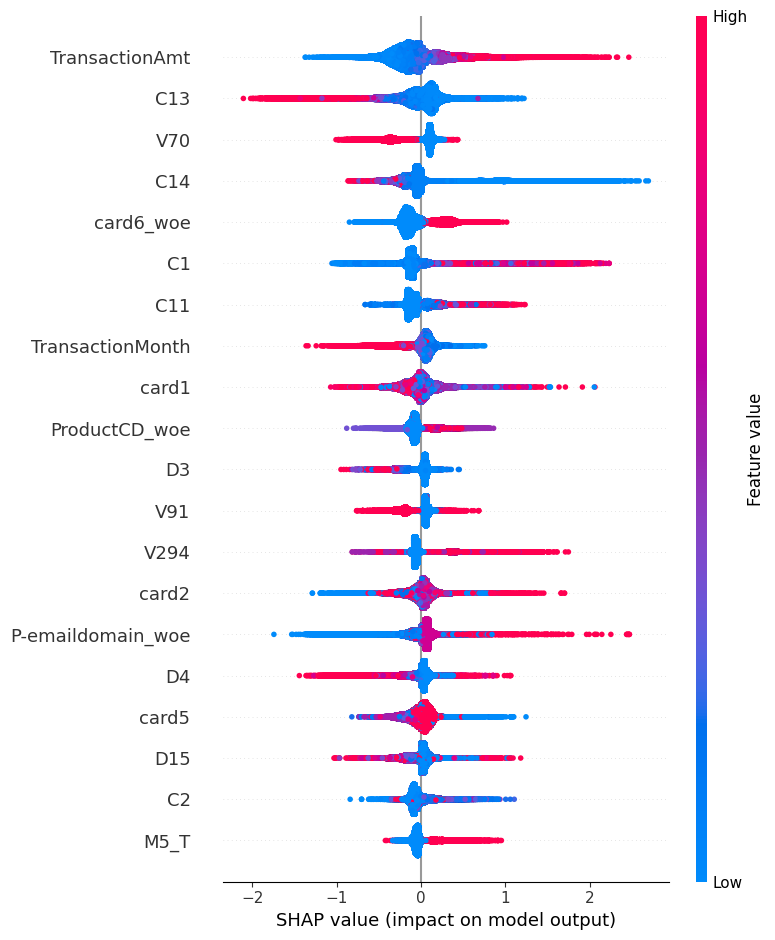

In [14]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train_encoded)

shap.plots.force(explainer.expected_value, shap_values[0])
shap.summary_plot(shap_values, X_train_encoded, plot_type="bar")
# Summary plot (beeswarm - distribution of SHAP values per feature)
shap.summary_plot(shap_values, X_train_encoded)

In [15]:
feature_importance = pd.DataFrame()
feature_importance['feature'] = X_train_encoded.columns
feature_importance['importance'] = np.abs(shap_values).mean(0)  # Average absolute SHAP value
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Print all features with their importance scores
feature_importance

,feature,importance
0,TransactionAmt,0.230608
21,C13,0.202401
107,V70,0.189750
22,C14,0.178466
406,card6_woe,0.166669
...,...,...
367,V330,0.000000
151,V114,0.000000
365,V328,0.000000
364,V327,0.000000


In [16]:
# Calculate cumulative importance
feature_importance['cumulative_importance'] = feature_importance['importance'].cumsum() / feature_importance['importance'].sum()
# Find features needed to reach 95% of total importance
important_features = feature_importance[feature_importance['cumulative_importance'] <= 0.95]['feature'].tolist()
print(f"Number of features to keep: {len(important_features)} out of {len(X_train.columns)}")
print(f"Features to drop: {set(X_train_encoded.columns) - set(important_features)}")

Number of features to keep: 144 out of 432
Features to drop: {'V269', 'V137', 'V145', 'V178', 'V304', 'V46', 'V262', 'V211', 'V63', 'V328', 'V105', 'V172', 'V330', 'V252', 'V123', 'V58', 'id-10', 'V185', 'id-16_NotFound', 'V174', 'V326', 'V280', 'V162', 'V175', 'V331', 'V140', 'V122', 'V142', 'V253', 'V196', 'V84', 'D7', 'V192', 'M1_T', 'V18', 'V236', 'V217', 'V230', 'V31', 'V292', 'V184', 'V22', 'V150', 'V168', 'V89', 'V305', 'V42', 'V157', 'V333', 'V335', 'V338', 'V188', 'id-21', 'V143', 'V235', 'V106', 'id-35_T', 'V204', 'V117', 'V100', 'V50', 'V306', 'V104', 'V288', 'DeviceType_mobile', 'V286', 'V208', 'V30', 'V155', 'V232', 'V207', 'V132', 'id-08', 'id-37_T', 'V339', 'V86', 'V40', 'V300', 'V173', 'id-36_T', 'id-23_IP_PROXY:HIDDEN', 'V215', 'V108', 'V153', 'dist2', 'V186', 'V23', 'V289', 'V190', 'id-15_Unknown', 'V239', 'V210', 'V16', 'V163', 'V273', 'V34', 'id-29_NotFound', 'V92', 'V216', 'V144', 'id-26', 'V166', 'M8_T', 'V65', 'V297', 'V148', 'V7', 'V195', 'D14', 'V295', 'V110', 

In [17]:
print(important_features)
print(X_train.shape)

['TransactionAmt', 'C13', 'V70', 'C14', 'card6_woe', 'C1', 'C11', 'TransactionMonth', 'card1', 'ProductCD_woe', 'D3', 'V91', 'V294', 'card2', 'P-emaildomain_woe', 'D4', 'card5', 'D15', 'C2', 'M5_T', 'V258', 'C5', 'addr1', 'D1', 'R-emaildomain_woe', 'C6', 'DeviceInfo_woe', 'M6_T', 'card3', 'C8', 'dist1', 'TransactionHour', 'D2', 'D10', 'V165', 'id-06', 'id-20', 'V308', 'M3_T', 'V281', 'V312', 'D8', 'D11', 'C9', 'V53', 'V82', 'id-33_woe', 'V55', 'V285', 'id-01', 'V48', 'id-02', 'card4_woe', 'TransactionDay', 'M4_M1', 'V314', 'V133', 'C12', 'id-30_woe', 'V307', 'V310', 'id-31_woe', 'V283', 'V45', 'V19', 'V131', 'V317', 'id-05', 'id-19', 'id-14', 'M4_M2', 'V129', 'V313', 'V302', 'V29', 'TransactionWeekday', 'V126', 'V87', 'V71', 'V35', 'V54', 'V219', 'C3', 'D13', 'D5', 'V130', 'V62', 'V38', 'V291', 'V2', 'V315', 'V320', 'id-13', 'V187', 'V189', 'V20', 'M9_T', 'V78', 'V135', 'V316', 'C10', 'V56', 'id-09', 'V309', 'id-15_New', 'V12', 'V5', 'V170', 'V75', 'C7', 'D6', 'V128', 'V94', 'V277', 'V

# Pipeline using Shap

In [18]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from xgboost import XGBClassifier

# Create an imbalanced-learn pipeline
imb_pipeline = ImbPipeline(steps=[
    ('initial_preprocessor', InitialPreprocessor()),
    ('feature_engineer', CustomFeatureEngineer()),
    ('na_processor', NA_Preprocessor(num_cols, cat_cols)),
    ('encoder', FinalCustomEncoder(woe_columns, one_hot_columns, important_features)),
    ('correlation_filter', CorrelationFilter(threshold=0.8)),
    ('scaler', StandardScaler()), 
    ('undersampler', RandomUnderSampler(random_state=42, sampling_strategy=0.2)),  # Undersampling step
    ('classifier', XGBClassifier(
                        n_estimators=700,
                        learning_rate=0.1,
                        max_depth=7,
                        eval_metric='aucpr', #aucpr
                        random_state=42
                    ))  # Your classifier
])

imb_pipeline.fit(X_train, y_train)

Processing ProductCD...
Processing card4...
Processing card6...
Processing P-emaildomain...
Processing R-emaildomain...
Processing id-30...
Processing id-31...
Processing id-33...
Processing id-34...
Processing DeviceInfo...
['C1', 'V130', 'V19', 'V136', 'C12', 'V307', 'V60', 'V189', 'V308', 'V313', 'V131', 'V36', 'V318', 'C11', 'V66', 'V285', 'C8', 'V71', 'V129', 'V314', 'V127', 'V102', 'V128', 'V294', 'V317', 'M4_M2', 'C10', 'V13', 'V70', 'V96', 'V279', 'V4', 'V134', 'C5', 'C14', 'D1', 'C6', 'V69', 'V64', 'V54', 'V316', 'C13', 'C7', 'V133', 'V91', 'V126', 'V296', 'V94']


Pipeline(steps=[('initial_preprocessor', InitialPreprocessor()),
                ('feature_engineer',
                 CustomFeatureEngineer(start_date=Timestamp('2017-12-01 00:00:00'))),
                ('na_processor',
                 NA_Preprocessor(cat_columns=['ProductCD', 'card4', 'card6',
                                              'P-emaildomain', 'R-emaildomain',
                                              'M1', 'M2', 'M3', 'M4', 'M5',
                                              'M6', 'M7', 'M8', 'M9', 'id-12',
                                              'id-15', 'id-16', 'id-23',
                                              'id-27', 'id-28', 'i...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=7, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=700, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [19]:
y_pred = imb_pipeline.predict(X_valid)
y_pred_proba = imb_pipeline.predict_proba(X_valid)[:, 1]

['C1', 'V130', 'V19', 'V136', 'C12', 'V307', 'V60', 'V189', 'V308', 'V313', 'V131', 'V36', 'V318', 'C11', 'V66', 'V285', 'C8', 'V71', 'V129', 'V314', 'V127', 'V102', 'V128', 'V294', 'V317', 'M4_M2', 'C10', 'V13', 'V70', 'V96', 'V279', 'V4', 'V134', 'C5', 'C14', 'D1', 'C6', 'V69', 'V64', 'V54', 'V316', 'C13', 'C7', 'V133', 'V91', 'V126', 'V296', 'V94']
['C1', 'V130', 'V19', 'V136', 'C12', 'V307', 'V60', 'V189', 'V308', 'V313', 'V131', 'V36', 'V318', 'C11', 'V66', 'V285', 'C8', 'V71', 'V129', 'V314', 'V127', 'V102', 'V128', 'V294', 'V317', 'M4_M2', 'C10', 'V13', 'V70', 'V96', 'V279', 'V4', 'V134', 'C5', 'C14', 'D1', 'C6', 'V69', 'V64', 'V54', 'V316', 'C13', 'C7', 'V133', 'V91', 'V126', 'V296', 'V94']


In [20]:
!pip install dagshub mlflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.1/260.1 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.2/28.2 MB 57.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 87.2 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 692.3/692.3 kB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.2/203.2 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.3/74.3 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.3 MB/s eta 0:00:00
  Attempting uninstall: dacite
    Found existing installation: dacite 1.9.2
    Uninstalling dacite-1.9.2:
      

❗❗❗ AUTHORIZATION REQUIRED ❗❗❗

Output()



Open the following link in your browser to authorize the client:
https://dagshub.com/login/oauth/authorize?state=588b15b8-3c6f-484e-95ce-64dc20a7a11a&client_id=32b60ba385aa7cecf24046d8195a71c07dd345d9657977863b52e7748e0f0f28&middleman_request_id=28b0336b4e29a97f157d721af3559e368f2be38174eb4211f277fc3648eae445




KeyboardInterrupt: 

In [22]:
import dagshub
dagshub.init(repo_owner='GLasare', repo_name='ML_Fraud_Detection', mlflow=True)

❗❗❗ AUTHORIZATION REQUIRED ❗❗❗

Output()



Open the following link in your browser to authorize the client:
https://dagshub.com/login/oauth/authorize?state=5e14bbd4-2757-4e13-97c5-9ae10e1b54b5&client_id=32b60ba385aa7cecf24046d8195a71c07dd345d9657977863b52e7748e0f0f28&middleman_request_id=182fb90764dcdff2b95a6cd7d7f6f6f5dc840109e5edcf6592dec7b977b91a4f




Accessing as GLasare

Initialized MLflow to track repo "GLasare/ML_Fraud_Detection"

Repository GLasare/ML_Fraud_Detection initialized!

In [23]:
import mlflow
class MLFlowLogger():
    def __init__(self, experiment_name, pipeline):
        self.exp = experiment_name
        self.pipeline = pipeline

    def set(self, run_name, log_func):
        self.run = run_name
        self.log_func = log_func

    def log(self):
        mlflow.set_experiment(self.exp)
        mlflow.start_run(run_name=self.run)
        self.log_func(self.pipeline)
        mlflow.end_run()

In [24]:
import mlflow
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

def cleaning_logger(imb_pipeline):
    na_step = imb_pipeline.named_steps['na_processor']
    mlflow.log_param("num_cols", ",".join(na_step.num_columns))
    mlflow.log_param("cat_cols", ",".join(na_step.cat_columns))
    mlflow.log_param("NA_filling_strategy", "Mode")
  
def feature_engineering_logger(imb_pipeline):
    encoder_step = imb_pipeline.named_steps['encoder']
    mlflow.log_param("woe_cols", ",".join(encoder_step.woe_columns))
    mlflow.log_param("one_hot_cols", ",".join(encoder_step.one_hot_columns))
    mlflow.log_param("scaler", "Standard Scaler")

    if isinstance(encoder_step, FinalCustomEncoder):
        mlflow.log_param("Shap Selected Features", ",".join(encoder_step.final_columns))
        

def feature_selection_logger(imb_pipeline):
    corr_filter_step = imb_pipeline.named_steps['correlation_filter']
    mlflow.log_param("corr_filter_threshold", corr_filter_step.threshold)
    mlflow.log_param("features_to_drop", ",".join(corr_filter_step.features_to_drop))
    mlflow.log_param("sampling_strategy", imb_pipeline.named_steps['undersampler'].sampling_strategy)


def cross_validation_logger(imb_pipeline):
    precision_scorer = make_scorer(precision_score)
    recall_scorer = make_scorer(recall_score)
    f1_scorer = make_scorer(f1_score)
    roc_auc_scorer = make_scorer(roc_auc_score)

    X_train_final, y_train_final = imb_pipeline[:-1].fit_resample(X_train, y_train)
    
    metrics = {
        'precision': precision_scorer,
        'recall': recall_scorer,
        'f1': f1_scorer,
        'roc_auc': roc_auc_scorer
    }

    model = imb_pipeline.named_steps['classifier']
    for metric_name, scorer in metrics.items():
        # Cross-validation using the current scorer
        scores = cross_val_score(model, X_train_final, y_train_final,
                                 scoring=scorer, cv=3, n_jobs=-1)
        
        # Log the average score and the standard deviation for each metric
        mlflow.log_metric(f"cv_{metric_name}_mean", scores.mean())
        mlflow.log_metric(f"cv_{metric_name}_std", scores.std())

        # Log individual fold scores for each metric
        for i, score in enumerate(scores):
            mlflow.log_metric(f"cv_{metric_name}_fold_{i+1}", score)
    

def training_logger(imb_pipeline):
    mlflow.log_param("model_type", "XGBoost")

    model = imb_pipeline.named_steps['classifier']
    for param_name, param_value in model.get_xgb_params().items():
        mlflow.log_param(param_name, param_value)
    
    mlflow.log_param("woe_columns_count", len(woe_columns))
    mlflow.log_param("one_hot_columns_count", len(one_hot_columns))

    accuracy = accuracy_score(y_valid, y_pred)
    precision = precision_score(y_valid, y_pred, average='binary')
    recall = recall_score(y_valid, y_pred, average='binary')
    f1 = f1_score(y_valid, y_pred, average='binary')
    
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("f1_score", f1)
    
    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_valid, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    mlflow.log_metric("roc_auc", roc_auc)
    
    # Plot ROC curve
    plt.figure(figsize=(10, 8))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.savefig("roc_curve.png")

    # Plot Precision-Recall curve
    precision_curve, recall_curve, _ = precision_recall_curve(y_valid, y_pred_proba)
    pr_auc = auc(recall_curve, precision_curve)
    mlflow.log_metric("pr_auc", pr_auc)
    
    plt.figure(figsize=(10, 8))
    plt.plot(recall_curve, precision_curve, color='blue', lw=2, label=f'PR curve (AUC = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower left")
    plt.tight_layout()
    plt.savefig("precision_recall_curve.png")
    mlflow.log_artifact("precision_recall_curve.png")
    
    # Plot confusion matrix
    cm = confusion_matrix(y_valid, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.tight_layout()
    plt.savefig("confusion_matrix.png")
    mlflow.log_artifact("confusion_matrix.png")
    mlflow.sklearn.log_model(imb_pipeline, "final_pipeline_model")


# Logging Cleaning, Feature Engineering, Feature Selection and Training

In [25]:
experiment_name = 'XGBoost_Final_Exp'
mlflow_logger = MLFlowLogger(experiment_name, imb_pipeline)

2025/04/23 07:21:41 INFO mlflow.tracking.fluent: Experiment with name 'XGBoost_Final_Exp' does not exist. Creating a new experiment.


🏃 View run XGBoost_Cleaning at: https://dagshub.com/GLasare/ML_Fraud_Detection.mlflow/#/experiments/18/runs/5fb27f943ec9476fa85b94ddb340f082
🧪 View experiment at: https://dagshub.com/GLasare/ML_Fraud_Detection.mlflow/#/experiments/18
🏃 View run XGBoost_Feature_Engineering at: https://dagshub.com/GLasare/ML_Fraud_Detection.mlflow/#/experiments/18/runs/f9514b6d12db45cb86491bd82c12af44
🧪 View experiment at: https://dagshub.com/GLasare/ML_Fraud_Detection.mlflow/#/experiments/18
🏃 View run XGBoost_Selection at: https://dagshub.com/GLasare/ML_Fraud_Detection.mlflow/#/experiments/18/runs/9af293d164744907905049094b436978
🧪 View experiment at: https://dagshub.com/GLasare/ML_Fraud_Detection.mlflow/#/experiments/18


2025/04/23 07:22:42 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run XGBoost_Training at: https://dagshub.com/GLasare/ML_Fraud_Detection.mlflow/#/experiments/18/runs/fb6acc0c566d470aa584263eaf4f57e3
🧪 View experiment at: https://dagshub.com/GLasare/ML_Fraud_Detection.mlflow/#/experiments/18
Processing ProductCD...
Processing card4...
Processing card6...
Processing P-emaildomain...
Processing R-emaildomain...
Processing id-30...
Processing id-31...
Processing id-33...
Processing id-34...
Processing DeviceInfo...
['C1', 'V130', 'V19', 'V136', 'C12', 'V307', 'V60', 'V189', 'V308', 'V313', 'V131', 'V36', 'V318', 'C11', 'V66', 'V285', 'C8', 'V71', 'V129', 'V314', 'V127', 'V102', 'V128', 'V294', 'V317', 'M4_M2', 'C10', 'V13', 'V70', 'V96', 'V279', 'V4', 'V134', 'C5', 'C14', 'D1', 'C6', 'V69', 'V64', 'V54', 'V316', 'C13', 'C7', 'V133', 'V91', 'V126', 'V296', 'V94']
🏃 View run XGBoost_Cross_Validation at: https://dagshub.com/GLasare/ML_Fraud_Detection.mlflow/#/experiments/18/runs/7c77fe08b7df4f5a8e2ac0b80781277e
🧪 View experiment at: https://dagshub.

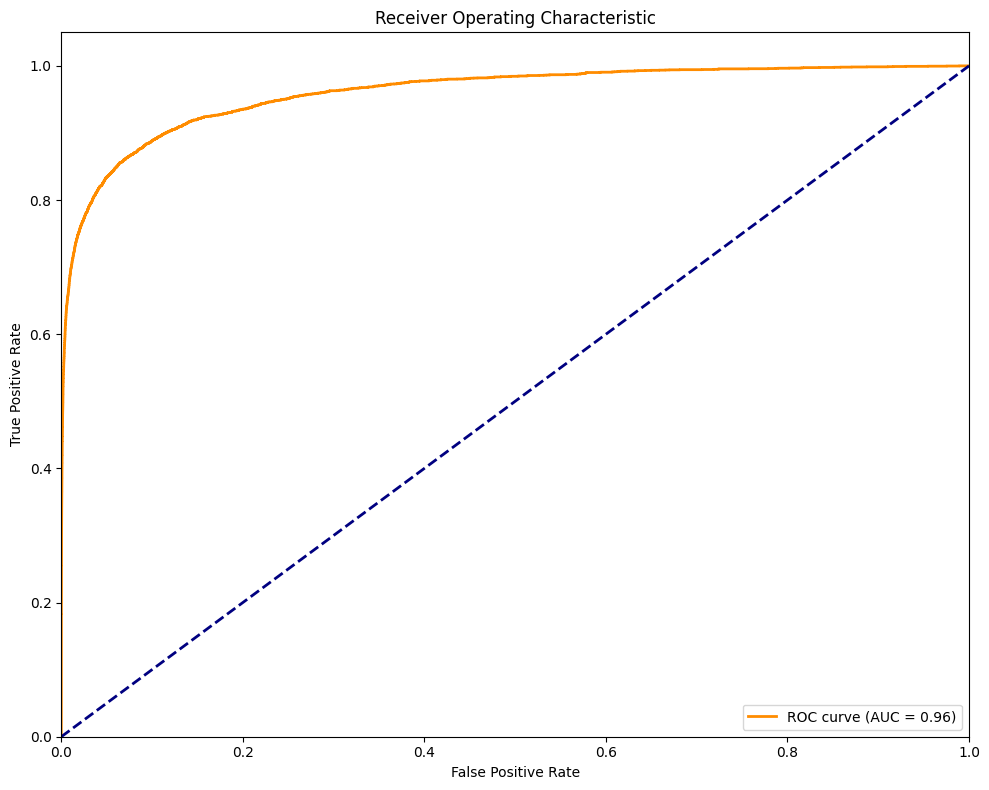

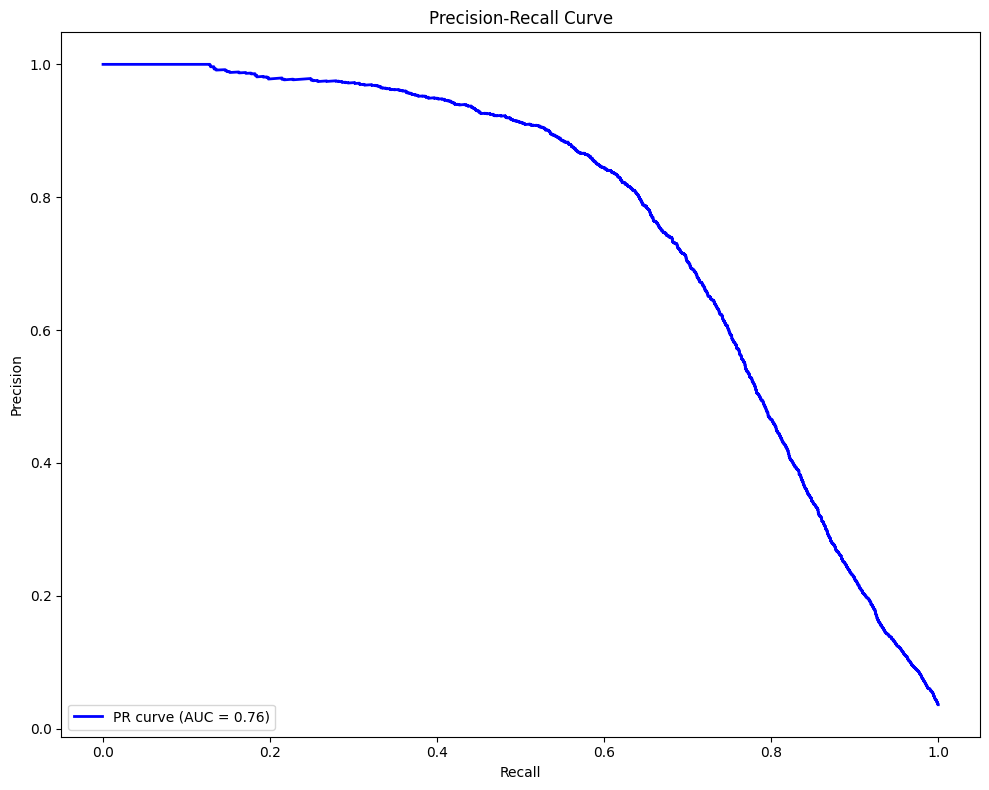

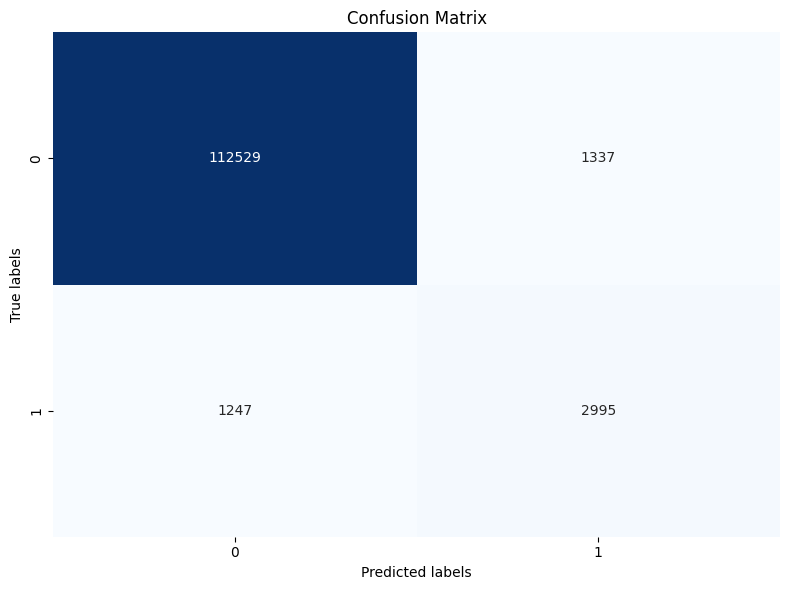

In [26]:
mlflow_logger.set("XGBoost_Cleaning", cleaning_logger)
mlflow_logger.log()

mlflow_logger.set("XGBoost_Feature_Engineering", feature_engineering_logger)
mlflow_logger.log()

mlflow_logger.set("XGBoost_Selection", feature_selection_logger)
mlflow_logger.log()

mlflow_logger.set("XGBoost_Training", training_logger)
mlflow_logger.log()

mlflow_logger.set("XGBoost_Cross_Validation", cross_validation_logger)
mlflow_logger.log()